In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("C:\\Users\\lclai\\Desktop\\research LDIG\\data_dementia\\clean\\pitt_withoutwords.csv")
df = df[(df['label'] == 0) | (df['label'] == 1)]

def remove_inv_phrases(text):
    if isinstance(text, str):
        sentences = [s.strip() for s in text.split('.') if s.strip()]
        cleaned = [s for s in sentences if not s.startswith("INV")]
        return '. '.join(cleaned) + ('.' if cleaned else '')

df["clean_transcripts"] = df["clean_transcripts"].apply(remove_inv_phrases)


sex = df["sex"].map({"M": 0, "F": 1}).to_numpy().reshape(-1, 1)
age = df["age"].to_numpy().reshape(-1, 1)
texts = df["clean_transcripts"].to_numpy()

y = LabelEncoder().fit_transform(df["label"])

X_raw = np.hstack((sex, age.reshape(-1, 1)))  

X_raw_train, X_raw_test, texts_train, texts_test, y_train, y_test = train_test_split(
    X_raw, texts, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(max_features=300)
X_text_train = vectorizer.fit_transform(texts_train).toarray()
X_text_test = vectorizer.transform(texts_test).toarray()

X_train = np.hstack((X_raw_train, X_text_train))
X_test = np.hstack((X_raw_test, X_text_test))


In [37]:
X_train = pd.DataFrame(X_train, columns=['sex','age']+ [f"feature_{i}" for i in range(X_train.shape[1] - 2)])
X_test = pd.DataFrame(X_test, columns=['sex','age']+ [f"feature_{i}" for i in range(X_test.shape[1] - 2)])
X_test

,sex,age,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299
0,1.0,69.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,1.0,77.0,0.265252,0.0,0.0,0.343984,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,73.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,1.0,87.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.244901,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,63.0,0.325419,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,72.0,0.361918,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.192567,0.0,0.000000,0.0,0.0,0.0,0.000000
96,0.0,79.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.207815,0.0,0.0,0.0,0.000000
97,1.0,84.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
98,0.0,73.0,0.434130,0.0,0.0,0.000000,0.0,0.0,0.0,0.212117,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


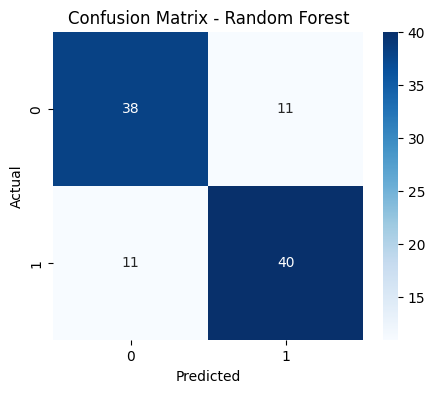

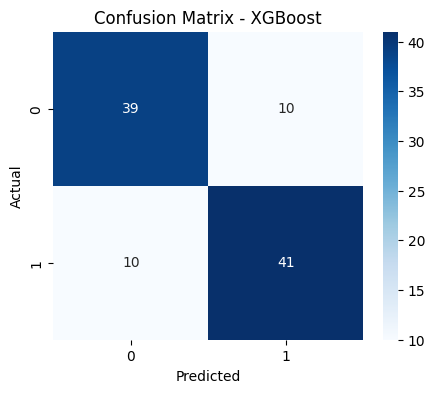

Model: Random Forest
Best Params: {'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 500}
Mean AUC (CV=5): 0.9114
STD AUC (CV=5): 0.0423
AUC on Test Set: 0.8796

Model: XGBoost
Best Params: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 1000, 'model__subsample': 0.8}
Mean AUC (CV=5): 0.8626
STD AUC (CV=5): 0.0633
AUC on Test Set: 0.9016



In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


non_scaled_columns = ['sex']  # no escalar
scaled_columns = [col for col in X_train.columns if col not in non_scaled_columns]


preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), scaled_columns)
    ],
    remainder='passthrough'  
)


models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


param_grids = {
    'Random Forest': {
        'model__n_estimators': [500, 1000],
        'model__max_depth': [None, 2,10],
        'model__min_samples_split': [2,5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': ['sqrt', 'log2']
    },
    'XGBoost': {
        'model__n_estimators': [500, 1000],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 6, 10],
        'model__subsample': [0.8, 1.0]
    }
}

results = {}

for model_name in models:
    model = models[model_name]
    param_grid = param_grids[model_name]

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    mean_auc_cv = grid_search.best_score_
    std_auc_cv = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, y_pred_proba)

    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'best_params': grid_search.best_params_,
        'mean_auc_cv': mean_auc_cv,
        'std_cv': std_auc_cv,
        'auc_test': auc_test,
        'best_model': best_model
    }

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Params: {result['best_params']}")
    print(f"Mean AUC (CV=5): {result['mean_auc_cv']:.4f}")
    print(f"STD AUC (CV=5): {result['std_cv']:.4f}")
    print(f"AUC on Test Set: {result['auc_test']:.4f}\n")


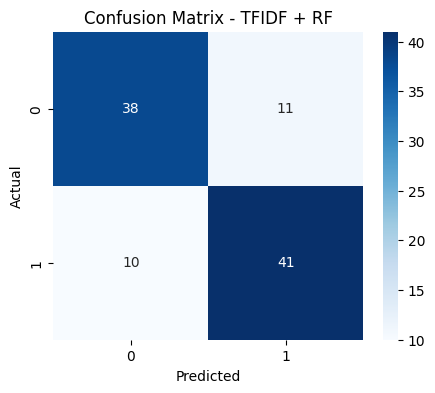

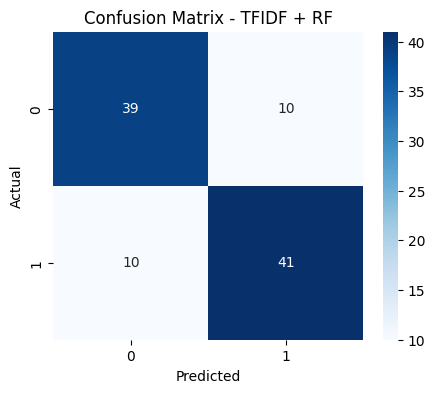

Model: Random Forest
AUC on Test Set: 0.8852
Accuracy: 0.7900
Precision: 0.7885
Sensitivity (Recall): 0.8039
Specificity: 0.7755

Model: XGBoost
AUC on Test Set: 0.9016
Accuracy: 0.8000
Precision: 0.8039
Sensitivity (Recall): 0.8039
Specificity: 0.7959



In [42]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


non_scaled_columns = ['sex']
scaled_columns = [col for col in X_train.columns if col not in non_scaled_columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), scaled_columns)
    ],
    remainder='passthrough'
)

models = {
    'Random Forest': RandomForestClassifier(
        max_depth=None,
        max_features='log2',
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=1000,
        random_state=42
    ),
    'XGBoost': xgb.XGBClassifier(
        learning_rate=0.01,
        max_depth=3,
        n_estimators=1000,
        subsample=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
}


results = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    y_pred = pipeline.predict(X_test)

    auc_test = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) 
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)

    results[model_name] = {
        'auc_test': auc_test,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity
    }

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - TFIDF + RF")
    plt.show()

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"AUC on Test Set: {metrics['auc_test']:.4f}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Sensitivity (Recall): {metrics['recall']:.4f}")
    print(f"Specificity: {metrics['specificity']:.4f}\n")


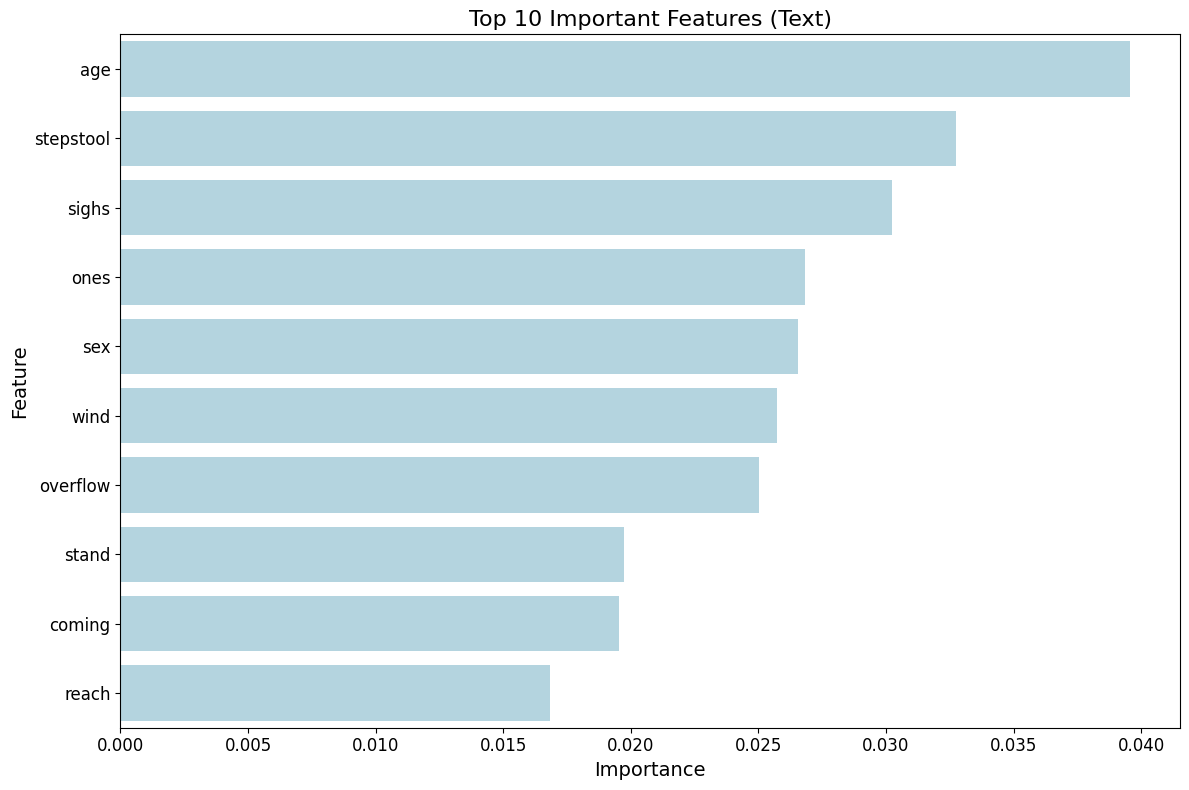

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Modelo
best_clf = RandomForestClassifier(
    max_depth=10,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=500,
    random_state=42
)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # preprocessor debe incluir scaler + vectorizer
    ('model', best_clf)
])

# Entrenamiento
pipeline.fit(X_train, y_train)

# Predicción
y_pred = pipeline.predict(X_test)

# Importancias del modelo
importances = pipeline.named_steps['model'].feature_importances_

# Lista de nombres de features en el orden del preprocessor
# Asegúrate de que estas listas estén en el mismo orden que el ColumnTransformer
tabular_features = ['age', 'sex']  # ajusta si hay más
text_features = vectorizer.get_feature_names_out()

feature_names = tabular_features + list(text_features)

# DataFrame de importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), color='lightblue')
plt.title('Top 10 Important Features (Text)', fontsize=16)
plt.xlabel('Importance',fontsize=14)
plt.ylabel('Feature',fontsize=14)
plt.yticks(fontsize=12)  
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()


Mean AUC CV (XGBoost): 0.8937
Mean AUC CV (Random Forest): 0.9216
Mean AUC CV (Ensemble XGB+RF): 0.9034
Std AUC CV (Ensemble XGB+RF): 0.0368
AUC on Test Set (Ensemble XGB+RF): 0.9004


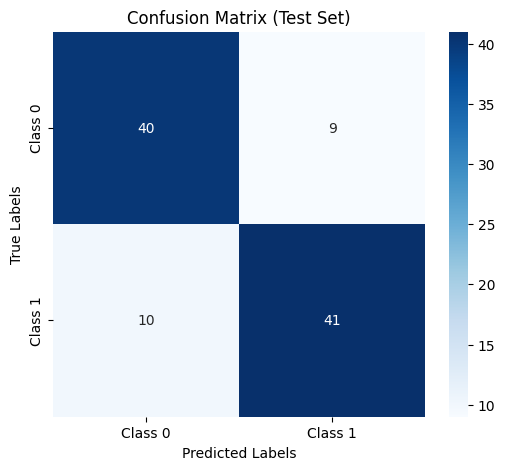

In [48]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

age_column = 'age'
sex_column = 'sex'
cols_to_scale = [col for col in X_train.columns if col not in [sex_column]]


xgb_clf = xgb.XGBClassifier(n_estimators=1000, max_depth=3, learning_rate=0.01, subsample=0.8, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=1, max_features="log2", random_state=42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_xgb_folds = []
auc_rf_folds = []
auc_ensemble_folds = []

for train_idx, val_idx in kf.split(X_train, y_train):
    X_train_fold = X_train.iloc[train_idx]
    X_val_fold = X_train.iloc[val_idx]
    y_train_fold = y_train[train_idx]
    y_val_fold = y_train[val_idx]

    preprocessor = ColumnTransformer(
        transformers=[
            ('scaler', StandardScaler(), cols_to_scale)
        ],
        remainder='passthrough'
    )

    pipe_xgb = Pipeline([
        ('preprocessor', preprocessor),
        ('model', xgb.XGBClassifier(**xgb_clf.get_params()))
    ])

    pipe_rf = Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(**rf_clf.get_params()))
    ])

    pipe_xgb.fit(X_train_fold, y_train_fold)
    pipe_rf.fit(X_train_fold, y_train_fold)

    pred_xgb = pipe_xgb.predict_proba(X_val_fold)[:, 1]
    pred_rf = pipe_rf.predict_proba(X_val_fold)[:, 1]
    pred_ensemble = (pred_xgb + pred_rf) / 2

    auc_xgb_folds.append(roc_auc_score(y_val_fold, pred_xgb))
    auc_rf_folds.append(roc_auc_score(y_val_fold, pred_rf))
    auc_ensemble_folds.append(roc_auc_score(y_val_fold, pred_ensemble))


final_preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), cols_to_scale)
    ],
    remainder='passthrough'
)

final_pipe_xgb = Pipeline([
    ('preprocessor', final_preprocessor),
    ('model', xgb_clf)
])

final_pipe_rf = Pipeline([
    ('preprocessor', final_preprocessor),
    ('model', rf_clf)
])

final_pipe_xgb.fit(X_train, y_train)
final_pipe_rf.fit(X_train, y_train)

pred_xgb = final_pipe_xgb.predict_proba(X_test)[:, 1]
pred_rf = final_pipe_rf.predict_proba(X_test)[:, 1]
pred_ensemble = (pred_xgb + pred_rf) / 2

auc_test = roc_auc_score(y_test, pred_ensemble)
y_pred_final = (pred_ensemble >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_final)


print(f"Mean AUC CV (XGBoost): {np.mean(auc_xgb_folds):.4f}")
print(f"Mean AUC CV (Random Forest): {np.mean(auc_rf_folds):.4f}")
print(f"Mean AUC CV (Ensemble XGB+RF): {np.mean(auc_ensemble_folds):.4f}")
print(f"Std AUC CV (Ensemble XGB+RF): {np.std(auc_ensemble_folds):.4f}")
print(f"AUC on Test Set (Ensemble XGB+RF): {auc_test:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import numpy as np

excluded_column = 'sex'
columns_to_scale = [col for col in X_train.columns if col != excluded_column]

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='auto', solver='lbfgs', random_state=42))
])


param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__max_iter': [100, 200, 500]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor score (CV AUC): {grid_search.best_score_:.4f}")
print(f"STD AUC CV: {grid_search.cv_results_['std_test_score'][grid_search.best_index_]:.4f}")
print(f"AUC en Test Set: {auc:.4f}")


Mejores parámetros: {'classifier__C': 0.01, 'classifier__max_iter': 100}
Mejor score (CV AUC): 0.9044
STD AUC CV: 0.0298
AUC en Test Set: 0.8639
